# 绘制 Dijkstra 最短路径

从节点 1 到节点 5 的最短路径: [1, 2, 3, 4, 5]
最短路径长度: 7


D:\Code\Python\MCM\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Code\Python\MCM\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30701 (\N{CJK UNIFIED IDEOGRAPH-77ED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Code\Python\MCM\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36335 (\N{CJK UNIFIED IDEOGRAPH-8DEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Code\Python\MCM\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24452 (\N{CJK UNIFIED IDEOGRAPH-5F84}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Code\Python\MCM\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  

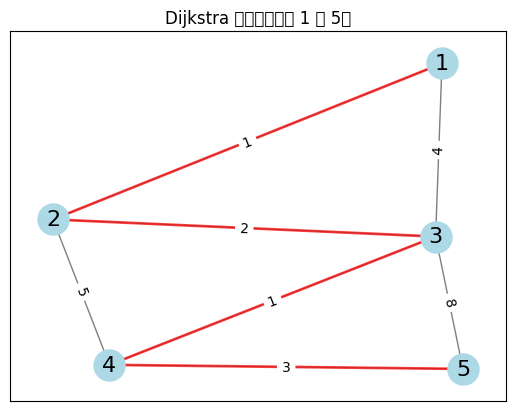

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个图
G = nx.Graph()

# 添加节点和带权边 # 这个是有向图
G.add_weighted_edges_from([
    (1, 2, 1),
    (1, 3, 4),
    (2, 3, 2),
    (2, 4, 5),
    (3, 4, 1),
    (3, 5, 8),
    (4, 5, 3)
])

# 计算 Dijkstra 最短路径
start_node = 1
end_node = 5
shortest_path = nx.dijkstra_path(G, source=start_node, target=end_node, weight='weight')
shortest_path_length = nx.dijkstra_path_length(G, source=start_node, target=end_node, weight='weight')

print(f"从节点 {start_node} 到节点 {end_node} 的最短路径: {shortest_path}")
print(f"最短路径长度: {shortest_path_length}")

# 绘制图形
pos = nx.spring_layout(G)  # 节点布局

# 绘制所有边
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# 绘制最短路径边
path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2.0, alpha=0.7)

# 绘制节点
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

# 绘制标签
nx.draw_networkx_labels(G, pos, font_size=16, font_family='sans-serif')

# 绘制权重
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# 显示图形
plt.title(f"Dijkstra 最短路径（从 {start_node} 到 {end_node}）")
plt.show()


# Floyd-Warshall 算法计算最短路径

In [2]:
import numpy as np

def floyd_warshall(adj_matrix):
    num_nodes = adj_matrix.shape[0]
    # 初始化距离矩阵
    dist = np.copy(adj_matrix)

    # Floyd-Warshall 算法
    for k in range(num_nodes):
        for i in range(num_nodes):
            for j in range(num_nodes):
                if dist[i, k] < np.inf and dist[k, j] < np.inf:
                    dist[i, j] = min(dist[i, j], dist[i, k] + dist[k, j])

    return dist

# 创建邻接矩阵
adj_matrix = np.array([
    [0, 2, 4, np.inf, np.inf, np.inf],
    [np.inf, 0, 1, 6, np.inf, np.inf],
    [np.inf, np.inf, 0, 3, np.inf, 8],
    [np.inf, np.inf, np.inf, 0, 5, np.inf],
    [np.inf, np.inf, np.inf, np.inf, 0, 7],
    [np.inf, np.inf, np.inf, np.inf, np.inf, 0]
])

# 计算最短路径
shortest_paths = floyd_warshall(adj_matrix)

# 打印结果
print("最短路径矩阵:")
print(shortest_paths)


最短路径矩阵:
[[ 0.  2.  3.  6. 11. 11.]
 [inf  0.  1.  4.  9.  9.]
 [inf inf  0.  3.  8.  8.]
 [inf inf inf  0.  5. 12.]
 [inf inf inf inf  0.  7.]
 [inf inf inf inf inf  0.]]


# Bellman-Ford 算法计算单源最短路径

In [3]:
import numpy as np

def bellman_ford(adj_matrix, source):
    num_nodes = adj_matrix.shape[0]
    # 初始化距离
    dist = np.full(num_nodes, np.inf)
    dist[source] = 0

    # 松弛操作
    for _ in range(num_nodes - 1):
        for u in range(num_nodes):
            for v in range(num_nodes):
                if adj_matrix[u, v] < np.inf:
                    if dist[u] + adj_matrix[u, v] < dist[v]:
                        dist[v] = dist[u] + adj_matrix[u, v]

    # 负权重环检测
    for u in range(num_nodes):
        for v in range(num_nodes):
            if adj_matrix[u, v] < np.inf:
                if dist[u] + adj_matrix[u, v] < dist[v]:
                    print("图中存在负权重环路")
                    return None

    return dist

# 创建邻接矩阵
adj_matrix = np.array([
    [0, 1, 4, np.inf, np.inf],
    [np.inf, 0, 2, 6, np.inf],
    [np.inf, np.inf, 0, 3, np.inf],
    [np.inf, np.inf, np.inf, 0, 5],
    [np.inf, np.inf, np.inf, np.inf, 0]
])

# 计算从源节点 0 到所有其他节点的最短路径
source_node = 0
shortest_paths = bellman_ford(adj_matrix, source_node)

if shortest_paths is not None:
    print(f"从节点 {source_node} 到所有节点的最短路径:")
    for i, dist in enumerate(shortest_paths):
        print(f"到节点 {i}: {dist}")


从节点 0 到所有节点的最短路径:
到节点 0: 0.0
到节点 1: 1.0
到节点 2: 3.0
到节点 3: 6.0
到节点 4: 11.0
